In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
maxAll = df.max()
minAll = df.min()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY, maxAll, " ", minAll, sep = '\n')

2.3134926739926738
2.4922985347985356
4.6584212454212475
1.741797285664983
0.8110039291512505
1.6652150617992907
MLOGP                             9.148
RDCHI                             6.439
quantitative response of LC50    10.047
dtype: float64
 
MLOGP                           -6.446
RDCHI                            1.000
quantitative response of LC50    0.122
dtype: float64


In [4]:
df1 = df.copy()
df1

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [5]:
df['MLOGP'] = (df['MLOGP'] - df['MLOGP'].min())/(df['MLOGP'].max() - df['MLOGP'].min())
df['RDCHI'] = (df['RDCHI'] - df['RDCHI'].min())/(df['RDCHI'].max() - df['RDCHI'].min())
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [6]:
print(df.max(), df.min(), sep = '\n')
df

MLOGP                             1.000
RDCHI                             1.000
quantitative response of LC50    10.047
dtype: float64
MLOGP                            0.000
RDCHI                            0.000
quantitative response of LC50    0.122
dtype: float64


,MLOGP,RDCHI,quantitative response of LC50
0,0.568488,0.041368,3.740
1,0.582532,0.073727,4.330
2,0.785238,0.354845,7.019
3,0.763050,0.346939,6.723
4,0.674234,0.323221,5.979
...,...,...,...
541,0.626651,0.337746,4.651
542,0.623381,0.317522,3.953
543,0.744581,0.388123,6.219
544,0.596704,0.296746,4.995


In [7]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [8]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
79,0.645376,0.403935,4.878
407,0.502822,0.245266,4.606
397,0.431897,0.291782,3.339
213,0.505836,0.093583,2.576
84,0.641785,0.235521,5.548
...,...,...,...
97,0.559125,0.271741,3.331
31,0.556111,0.048722,3.718
485,0.493267,0.199669,9.099
400,0.525459,0.253172,4.790


In [9]:
test

,MLOGP,RDCHI,quantitative response of LC50
358,0.655124,0.384446,4.010
312,0.625882,0.187167,5.430
280,0.636399,0.166942,4.787
465,0.579454,0.284243,3.601
166,0.427729,0.203714,1.888
...,...,...,...
359,0.563871,0.412392,3.917
471,0.486790,0.300974,9.150
191,0.622355,0.179261,4.530
160,0.541939,0.269903,3.770


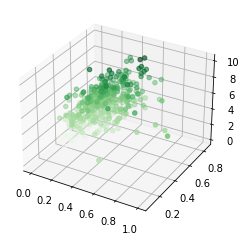

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [11]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
79,0.403935,0.645376
407,0.245266,0.502822
397,0.291782,0.431897
213,0.093583,0.505836
84,0.235521,0.641785
...,...,...
97,0.271741,0.559125
31,0.048722,0.556111
485,0.199669,0.493267
400,0.253172,0.525459


In [12]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
79,4.878
407,4.606
397,3.339
213,2.576
84,5.548
...,...
97,3.331
31,3.718
485,9.099
400,4.790


In [13]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
0.40393454679168966


In [14]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
358,0.384446,0.655124
312,0.187167,0.625882
280,0.166942,0.636399
465,0.284243,0.579454
166,0.203714,0.427729
...,...,...
359,0.412392,0.563871
471,0.300974,0.486790
191,0.179261,0.622355
160,0.269903,0.541939


In [15]:
testY

,quantitative response of LC50
358,4.010
312,5.430
280,4.787
465,3.601
166,1.888
...,...
359,3.917
471,9.150
191,4.530
160,3.770


In [16]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()
testXVal1 = testXVal[:,0]**2 ##-----------------------------------------------------------------------------------------x1^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,0]*testXVal[:,1] #-------------------------------------------------------------------------------x1x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**2 ##-----------------------------------------------------------------------------------------x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**3 ##-----------------------------------------------------------------------------------------x1^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]) ##-----------------------------------------------------------------------x1^2x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**2) ##-----------------------------------------------------------------------x1x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**3 #------------------------------------------------------------------------------------------x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**4 #------------------------------------------------------------------------------------------x1^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]) #------------------------------------------------------------------------x1^3x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^2x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**3) #------------------------------------------------------------------------x1x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**4 #------------------------------------------------------------------------------------------x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**5 #------------------------------------------------------------------------------------------x1^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]) #------------------------------------------------------------------------x1^4x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^3x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^2x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**4) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**5 #------------------------------------------------------------------------------------------x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**6 #------------------------------------------------------------------------------------------x1^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]) #------------------------------------------------------------------------x1^5x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^4x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^3x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^2x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**5) #------------------------------------------------------------------------x1x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**6 #------------------------------------------------------------------------------------------x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**7 #------------------------------------------------------------------------------------------x1^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]) #------------------------------------------------------------------------x1^6x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^5x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^4x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^3x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^2x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**6) #------------------------------------------------------------------------x1x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**7 #------------------------------------------------------------------------------------------x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)


testXVal1 = testXVal[:,0]**8 #------------------------------------------------------------------------------------------x1^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]) #------------------------------------------------------------------------x1^7x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^6x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^5x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^4x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^3x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^2x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**7) #------------------------------------------------------------------------x1x2^7
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**8 #------------------------------------------------------------------------------------------x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal1 = testXVal[:,0]**9 #------------------------------------------------------------------------------------------x1^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**8)*(testXVal[:,1]) #------------------------------------------------------------------------x1^8x2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**7)*(testXVal[:,1]**2) #---------------------------------------------------------------------x1^7x2^2
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**6)*(testXVal[:,1]**3) #---------------------------------------------------------------------x1^6x2^3
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**5)*(testXVal[:,1]**4) #---------------------------------------------------------------------x1^5x2^4
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**4)*(testXVal[:,1]**5) #---------------------------------------------------------------------x1^4x2^5
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**3)*(testXVal[:,1]**6) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0]**2)*(testXVal[:,1]**7) #---------------------------------------------------------------------x1^3x2^6
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = (testXVal[:,0])*(testXVal[:,1]**8) #------------------------------------------------------------------------x1x2^8
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)
testXVal1 = testXVal[:,1]**9 #------------------------------------------------------------------------------------------x2^9
testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((110,1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# testXVal is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(testXVal[0,1])


(110, 1)
(110, 55)
0.3844456701599559


In [17]:
iters = 10000
learningRate = 0.001 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

In [18]:
TrainErr = np.array([])
TestErr = np.array([])

w0 = 4.643479357798165


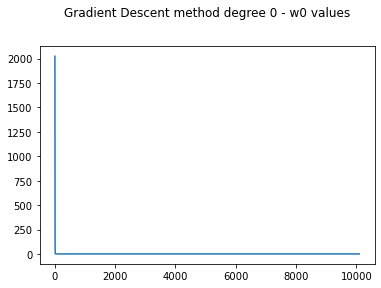

In [19]:
# Degree 0 manipulation for other degrees w = np.zeros((wSize, 1))
w = 0
wSize = 1
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.sum(valY-w))
    #print(w1,w)

    counter+=1
    costArr[counter] = (np.sum(valY-w))
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree 0 - w0 values", y = 1, pad = 30)
plt.show() 

In [20]:
#training data error for degree 0
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,0]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.362289285337409

In [21]:
# testing data error for degree 0
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (w - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.4702663557384883

In [22]:
degree = 1

In [23]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.962114687370763
w1=1.4657490956374357
w2=2.3549172780389362


436

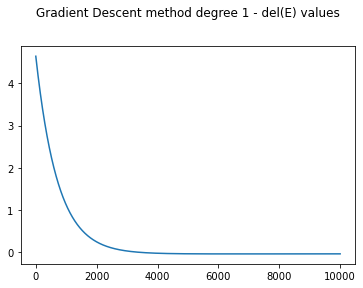

In [24]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [25]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

1.052807057265151

In [26]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.2147966389197304

In [27]:
degree = 2

In [28]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.6021481110013833
w1=1.1903573892713677
w2=1.9808843870937087
w3=0.45946367324937387
w4=0.8222586138837299
w5=1.4413809779382967


436

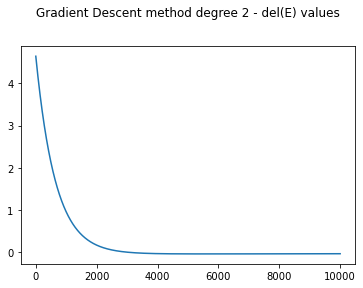

In [29]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [30]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.9562166391912658

In [31]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1411449908651152

In [32]:
degree = 3

In [33]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.5136663996709014
w1=1.0868117385218372
w2=1.844434962835148
w3=0.40029893278921963
w4=0.7358127966796925
w5=1.3120088680880098
w6=0.14305384912024013
w7=0.2744843677537663
w8=0.5004248238002765
w9=0.9225921018837322


436

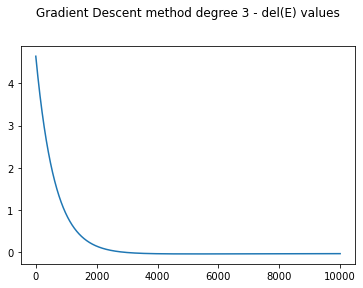

In [34]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [35]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.9247557034387169

In [36]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1289604011842487

In [37]:
degree = 4

In [38]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.4924878531978143
w1=1.0451461417995618
w2=1.7896291875276373
w3=0.37532415622479404
w4=0.6979333495415044
w5=1.2546010895124018
w6=0.12902139322858078
w7=0.25435775282480333
w8=0.46941662640554965
w9=0.8725033866874974
w10=0.03567709267034246
w11=0.09219158752099729
w12=0.17289753008759925
w13=0.3187754773588545
w14=0.606782128097512


436

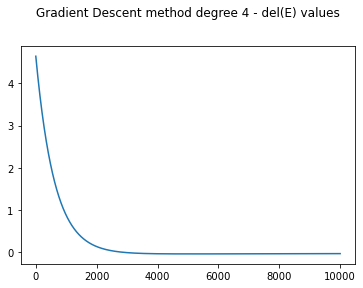

In [39]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [40]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.9133250368046062

In [41]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.135610066722776

In [42]:
degree = 5

In [43]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.488592192293195
w1=1.0275181235450825
w2=1.7661384318526459
w3=0.36439421755899903
w4=0.6806005850193524
w5=1.2278808191348534
w6=0.12290964729014418
w7=0.2450156453426122
w8=0.4546102986054568
w9=0.848262832934112
w10=0.032232534087397464
w11=0.087204333584362
w12=0.1654018187179604
w13=0.3068079775563901
w14=0.5865699430798775
w15=-0.003421165141707081
w16=0.027360680862311495
w17=0.0608911699841445
w18=0.11246419217553508
w19=0.20921738715674532
w20=0.4076926455608046


436

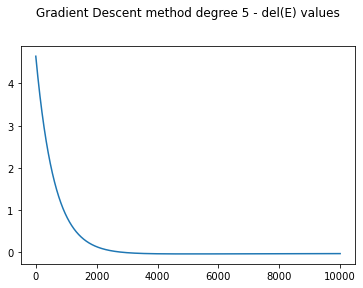

In [44]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [45]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.908734739301484

In [46]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1468410473630413

In [47]:
degree = 6

In [48]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.488838741438742
w1=1.0197942246545546
w2=1.7555658694999015
w3=0.3595042889798277
w4=0.6724014152760465
w5=1.2149838868481317
w6=0.12023215552270773
w7=0.24056532993405202
w8=0.4473314107695859
w9=0.8361823995850004
w10=0.030807488690445542
w11=0.08485145662132129
w12=0.16169653217187285
w13=0.30077296217859834
w14=0.5762781201963467
w15=-0.004163400035668745
w16=0.026097946500447455
w17=0.05896632901026671
w18=0.10948927508514683
w19=0.2043720600254959
w20=0.3992992745569816
w21=-0.017926240697614077
w22=0.0028001913319198133
w23=0.019964727795511228
w24=0.040773987391687756
w25=0.07467991685338195
w26=0.14030710044878403
w27=0.2788009352166217


436

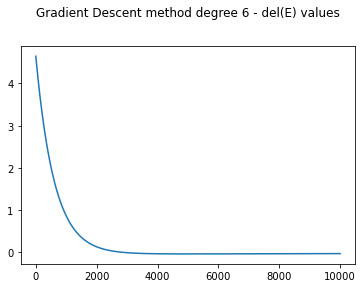

In [49]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [50]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.9067290650094652

In [51]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1578632205525445

In [52]:
degree = 7

In [53]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.489775426134579
w1=1.0163428993771046
w2=1.7506155936734742
w3=0.35731046111997505
w4=0.668423090270203
w5=1.2085681175339011
w6=0.11909126700222321
w7=0.23840907461865654
w8=0.443666050830859
w9=0.8300086803545932
w10=0.03027286095787167
w11=0.08373574323403017
w12=0.15982839365765983
w13=0.29766178052787734
w14=0.5709214915703643
w15=-0.0043660358209847835
w16=0.025528052878823898
w17=0.05800417121591514
w18=0.10795063291933657
w19=0.20183042218223166
w20=0.3948673667695229
w21=-0.017946509581141586
w22=0.002519626138238115
w23=0.01945827607435378
w24=0.03998372604541993
w25=0.07344273900923506
w26=0.13827044892685617
w27=0.2752218948642728
w28=-0.022796019884111104
w29=-0.006700092364992683
w30=0.00410433508593195
w31=0.01417146365617823
w32=0.02750091790688949
w33=0.05031403984869159
w34=0.09568170247387596
w35=0.19355110016776542


436

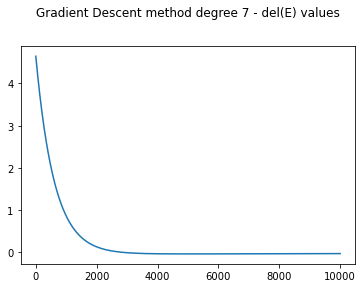

In [54]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [55]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.9057820265379032

In [56]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1672201615522744

In [57]:
degree = 8

In [58]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.490585808117852
w1=1.0148000709435554
w2=1.7482168234589497
w3=0.35635345322566025
w4=0.6664564026022092
w5=1.205289123728098
w6=0.11865208008316992
w7=0.2373574810295909
w8=0.4417823340486343
w9=0.8267800769849418
w10=0.03013520048378231
w11=0.08321449442818246
w12=0.1588725320757608
w13=0.2960259595356658
w14=0.5680760097883473
w15=-0.004338547211818777
w16=0.02528677105875882
w17=0.05752026338644052
w18=0.10714130354965153
w19=0.20047219201421052
w20=0.39248362452695934
w21=-0.017829134764819725
w22=0.0024269975634226386
w23=0.019213075383651003
w24=0.03957061745560296
w25=0.07277967256244412
w26=0.137168051241208
w27=0.2732764305848324
w28=-0.022629754163553135
w29=-0.006712016899180386
w30=0.00398404947398005
w31=0.013954494995285706
w32=0.027161025903581066
w33=0.049779546015128275
w34=0.09479742199822314
w35=0.19198540803255582
w36=-0.023690901345922437
w37=-0.010134487002696143
w38=-0.002178071779994989
w39=0.0037392127393172663
w40=0.009865733453546808
w41=0.0186248634283

436

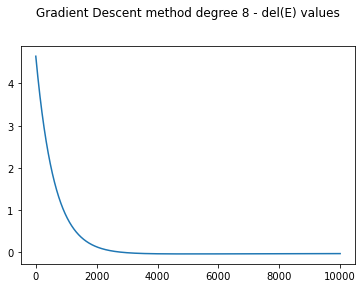

In [59]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [60]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/(np.shape(valX)[0]*2)

0.9052980472887512

In [61]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/(np.shape(testXVal)[0]*2)

1.1746796109055686

In [62]:
degree = 9

In [63]:
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[j,0]-np.sum(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
 

w0=2.491153603281541
w1=1.014131390172643
w2=1.7470167275797588
w3=0.35597347258133477
w4=0.6654727439160668
w5=1.2035697207849354
w6=0.11853520762301924
w7=0.23684879782120927
w8=0.44079720645788817
w9=0.8250537438501553
w10=0.030172205738961563
w11=0.08298331178605722
w12=0.15837893498196984
w13=0.29515008175176893
w14=0.5665341699088615
w15=-0.0042176875128908
w16=0.025202542701021406
w17=0.05727818142743731
w18=0.10670947999922101
w19=0.1997334305291262
w20=0.39117815511862425
w21=-0.01766334900970935
w22=0.002420718208375751
w23=0.01909869080522492
w24=0.03935289321265543
w25=0.0724186916897235
w26=0.13656124096205705
w27=0.2722012346262383
w28=-0.02244030971593893
w29=-0.006676252773653824
w30=0.003936585501151878
w31=0.013843226543563372
w32=0.026976680388784827
w33=0.04948439995567323
w34=0.0943058877277621
w35=0.19111311432776834
w36=-0.02348949851581034
w37=-0.010075811123787496
w38=-0.0021892953839771382
w39=0.0036834336463110115
w40=0.009768286252565409
w41=0.01847304192896

436

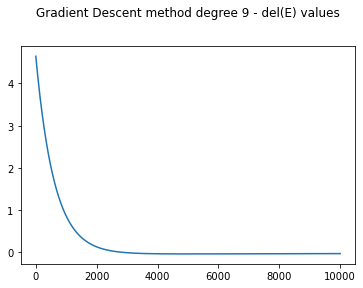

In [64]:
fig,ax = plt.subplots()
ax.plot(costArr[1:-1])
plt.title("Gradient Descent method degree %d - del(E) values"% degree, y = 1, pad = 30)
plt.show() # the number of iterations are maxed out in the end,

In [65]:
# training data error
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2

TrainErr = np.append(TrainErr,w1/(np.shape(valX)[0]*2))
w1/np.shape(valX)[0]

1.8100580945084945

In [66]:
# testing data error
testError = 0
for i in range(np.shape(testXVal)[0]):
    testError += (np.sum(w*testXVal[i,:wSize]) - testYVal[i,0])**2

TestErr = np.append(TestErr,testError/(np.shape(testXVal)[0]*2))
testError/np.shape(testXVal)[0]

2.3608774375749757

In [67]:
TrainErr

array([1.36228929, 1.05280706, 0.95621664, 0.9247557 , 0.91332504,
       0.90873474, 0.90672907, 0.90578203, 0.90529805, 0.90502905])

In [68]:
TestErr

array([1.47026636, 1.21479664, 1.14114499, 1.1289604 , 1.13561007,
       1.14684105, 1.15786322, 1.16722016, 1.17467961, 1.18043872])

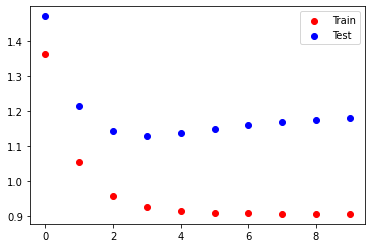

In [69]:
X = np.array([i for i in range(10)])
fig, ax = plt.subplots()
Tr = plt.scatter(X, TrainErr, c = 'r')
Te = plt.scatter(X, TestErr, c = 'b')
plt.legend((Tr,Te), ('Train','Test'))
plt.show()

In [70]:
k = np.random.randint(low = 0, high = np.shape(valX)[0])
k

23

w0=4.872988788385393


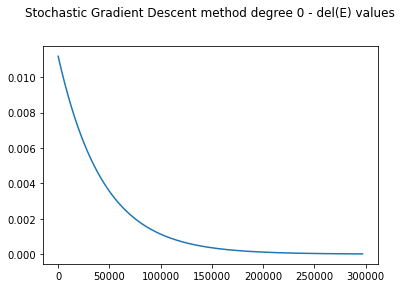

In [71]:
# degree 0
iters = 3000
learningRate = 0.01
degree = 0
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 0 - del(E) values", y = 1, pad = 30)
plt.show()  

w0=4.872988788385393
w1=1.3033701261317947
w2=5.589470429322092


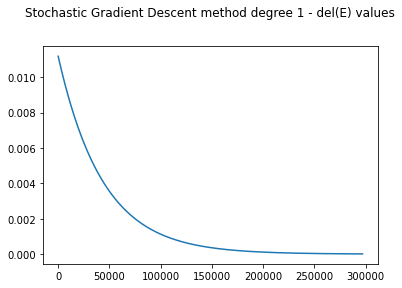

In [72]:
# degree 1
iters = 3000
learningRate = 0.01
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 1 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=4.872988788385393
w1=7.232495138632916
w2=4.134552655804307
w3=1.6981109974555513
w4=7.775136999679042
w5=6.8010004922897656


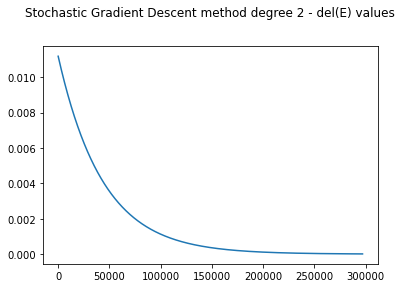

In [73]:
# degree 2
iters = 3000
learningRate = 0.01
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 2 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=4.872988788385393
w1=7.699621719750104
w2=5.571921665740549
w3=3.0869270066088923
w4=6.75238010417527
w5=5.697201330299691
w6=4.139006957277931
w7=1.780787102813654
w8=2.9806717206577367
w9=2.7780027269211964


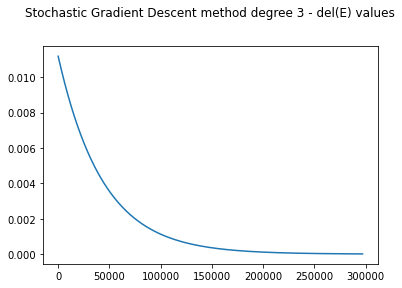

In [74]:
# degree 3
iters = 3000
learningRate = 0.01
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters*100+1)
counterArr = np.zeros(iters*100+1)
for i in range(iters*100):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-1*iters])
plt.title("Stochastic Gradient Descent method degree 3 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=4.872988788385393
w1=4.514073590383789
w2=5.587554606998694
w3=0.42194062038298663
w4=2.4307248309582152
w5=5.003416960600739
w6=0.17650374939139832
w7=0.20152723755871818
w8=0.8935286167181383
w9=2.1761096972195735
w10=0.012264097252123891
w11=0.039392257543072844
w12=0.1654051374186072
w13=0.28387276637500475
w14=0.8406992525748763


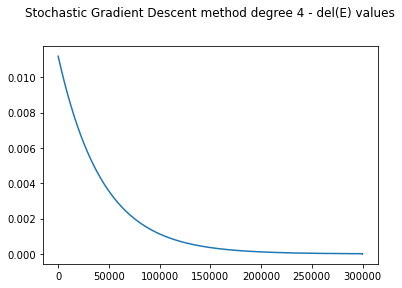

In [75]:
# degree 4
iters = 300000
learningRate = 0.01
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 4 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=4.872988788385393
w1=6.988572409140707
w2=1.7973832683306692
w3=4.243432568502418
w4=1.8372260074208218
w5=0.20281143689143183
w6=9.058860764030811
w7=0.593120990218175
w8=0.12864174689848556
w9=0.015492083567492569
w10=2.7442641599716615
w11=0.45617082082510135
w12=0.0933270093734416
w13=0.007798407868154214
w14=0.0011271491874357917
w15=3.003223645101945
w16=0.3614843578141876
w17=0.039554881947737694
w18=0.004564436243143238
w19=0.0012168387491807847
w20=0.00022605586833895696


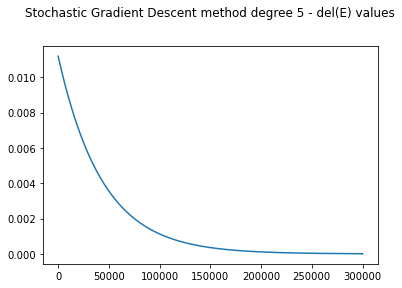

In [76]:
# degree 5
iters = 300000
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 5 - del(E) values", y = 1, pad = 30)
plt.show() 

w0=4.872988788385393
w1=7.431491842159798
w2=4.726340983320595
w3=3.8438098572428903
w4=9.084064582896133
w5=7.690394780564581
w6=6.624255570289102
w7=3.4009117132602156
w8=6.610104538954089
w9=6.861796812356446
w10=1.6680022083995245
w11=2.4889506584863237
w12=4.815659111746328
w13=3.759888961204585
w14=4.973443640066326
w15=1.5575176560866533
w16=1.7659837701780576
w17=1.8571317068124378
w18=2.052551648254992
w19=5.208871150520419
w20=9.12117880005323
w21=0.7664040613244076
w22=1.1514642722155737
w23=1.1284614053462203
w24=1.4123535367569773
w25=2.1710315227575316
w26=2.805183815267244
w27=3.929899468893601


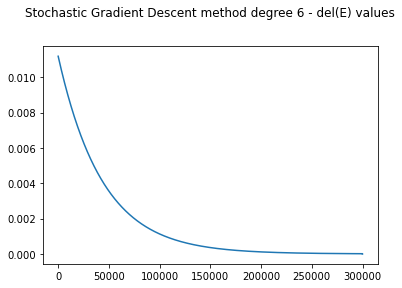

In [77]:
# degree 6
iters = 300000
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 6 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 7
iters = 300000
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 7 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 8
iters = 300000
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += (((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.title("Stochastic Gradient Descent method degree 8 - del(E) values", y = 1, pad = 30)
plt.show() 

In [ ]:
# degree 9
iters = 300000
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)
k = np.random.randint(low = 0, high = np.shape(valX)[0])
counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    w2 += ((((valY[:wSize,0] - (w*valX[k,:wSize])))*valX[k,:wSize])/np.shape(valX)[0])/10**10
    
    w1 = w + learningRate*w2
    w=w1
    costArr[counter] = w2[0]*10**10
    counter+=1
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:-10])
plt.title("Stochastic Gradient Descent method degree 9 - del(E) values", y = 1, pad = 30)
plt.show() 